In [1]:
import scanpy as sc
import anndata2ri
import logging
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

/tmp/ipykernel_1278819/2385762203.py:20: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [3]:
%%R
library(scry)

In [4]:
adata = sc.read(
    filename="dataset/s4d8_normalization.h5ad",
    # backup_url="https://figshare.com/ndownloader/files/40015741",
)

In [5]:
ro.globalenv["adata"] = adata

In [6]:
%%R
sce = devianceFeatureSelection(adata, assay="X")

In [7]:
binomial_deviance = ro.r("rowData(sce)$binomial_deviance").T

In [8]:
# sort the vector an select the top 4,000 highly deviant genes
idx = binomial_deviance.argsort()[-4000:]
mask = np.zeros(adata.var_names.shape, dtype=bool)
mask[idx] = True

adata.var["highly_deviant"] = mask
adata.var["binomial_deviance"] = binomial_deviance

In [9]:
adata.var

,gene_ids,feature_types,genome,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_deviant,binomial_deviance
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,False,False,False,30,0.001831,0.001829,99.822842,31.0,3.465736,27,False,305.977569
AL627309.5,ENSG00000241860,Gene Expression,GRCh38,False,False,False,146,0.008976,0.008936,99.137829,152.0,5.030438,126,False,1129.011479
LINC01409,ENSG00000237491,Gene Expression,GRCh38,False,False,False,883,0.063009,0.061104,94.785638,1067.0,6.973543,758,False,4689.349185
LINC01128,ENSG00000228794,Gene Expression,GRCh38,False,False,False,533,0.036140,0.035503,96.852486,612.0,6.418365,437,False,3210.363150
LINC00115,ENSG00000225880,Gene Expression,GRCh38,False,False,False,72,0.004370,0.004360,99.574820,74.0,4.317488,64,False,639.100814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC011043.1,ENSG00000276256,Gene Expression,GRCh38,False,False,False,134,0.008740,0.008702,99.208693,148.0,5.003946,104,False,975.463697
AL354822.1,ENSG00000278384,Gene Expression,GRCh38,False,False,False,82,0.005256,0.005242,99.515767,89.0,4.499810,66,False,720.924934
AL592183.1,ENSG00000273748,Gene Expression,GRCh38,False,False,False,1291,0.111433,0.105650,92.376284,1887.0,7.543273,1115,True,7295.876638
AC240274.1,ENSG00000271254,Gene Expression,GRCh38,False,False,False,300,0.019015,0.018836,98.228416,322.0,5.777652,262,False,2054.820421


In [10]:
# compute the mean and dispersion for each gene accross all cells for visualization
sc.pp.highly_variable_genes(adata, layer="scran_normalization")

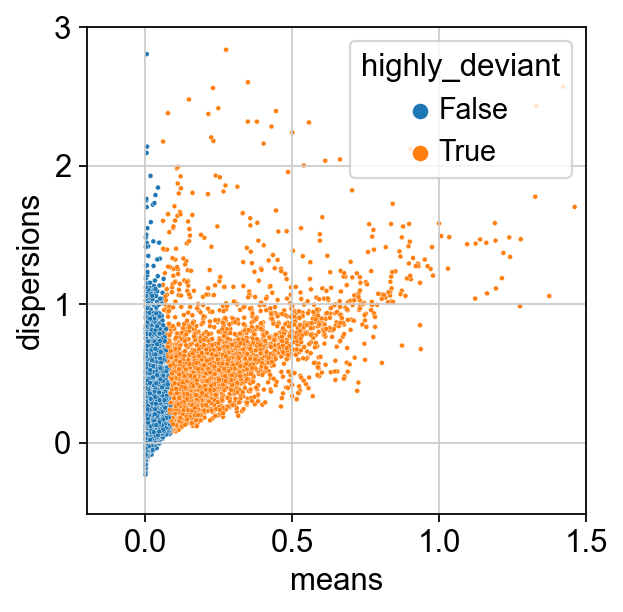

In [11]:
ax = sns.scatterplot(
    data=adata.var, x="means", y="dispersions", hue="highly_deviant", s=5
)
ax.set_xlim(None, 1.5)
ax.set_ylim(None, 3)
plt.show()

In [12]:
# adata.write("s4d8_feature_selection.h5ad")

In [12]:
import session_info

session_info.show()

In [13]:
%%R

sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.3 LTS

Matrix products: default
BLAS/LAPACK: /home/mowp/mambaforge/envs/sc/lib/libmkl_intel_lp64.so.2

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    tools     stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] Matrix_1.5-3                SingleCellExperiment_1.20.0
 [3] SummarizedExperiment_1.28.0 Biobase_2.58.0             
 [5] GenomicRanges_1.50.0        GenomeInfoDb_1.34.9        
 [7] IRanges_2.32.0              MatrixGenerics_1.10.0      
 [9] matrixStats_1.0.0           S4Vectors_